<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## **Task 1: Overview of Dataset**

In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## **Task 2: Generate Descriptive Statistics and Visualisations**

### **Boxplot for Median value of owner-occupied homes**

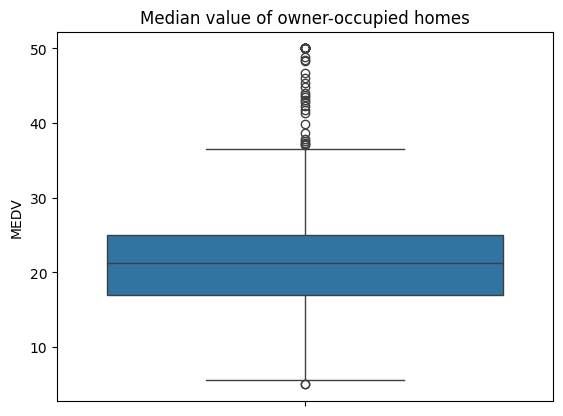

In [7]:
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_title('Median value of owner-occupied homes')
pyplot.show()

### **Barplot for Charles river variable**

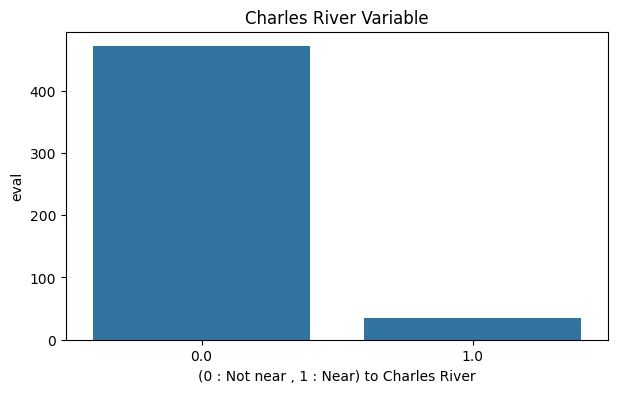

In [8]:
pyplot.figure(figsize=(7,4))
ax = sns.countplot(x=boston_df['CHAS'])
pyplot.title("Charles River Variable")
pyplot.xlabel("(0 : Not near , 1 : Near) to Charles River")
pyplot.ylabel("eval")
pyplot.show()

### Boxplot for the MEDV variable vs the AGE variable 

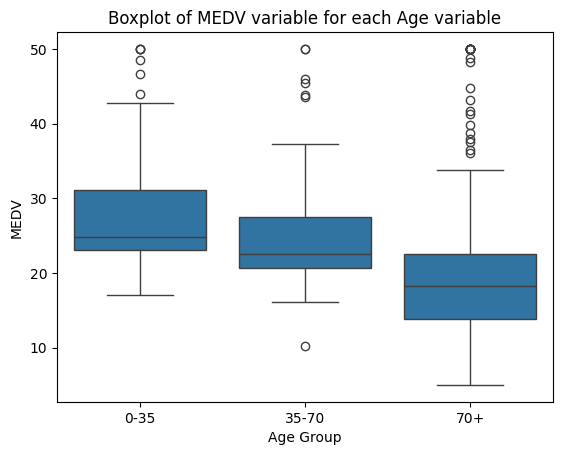

In [9]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['0-35', '35-70', '70+'])
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.xlabel('Age Group')
pyplot.ylabel('MEDV')
pyplot.title('Boxplot of MEDV variable for each Age variable')
pyplot.show()              
                                 

### Scatterplot for the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

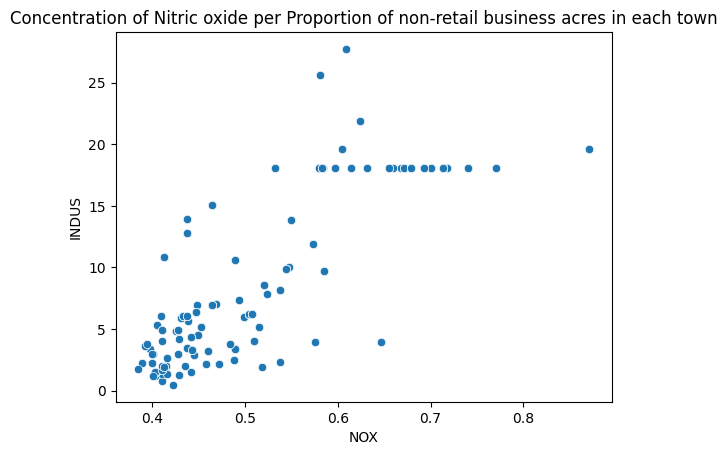

In [10]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
pyplot.title("Concentration of Nitric oxide per Proportion of non-retail business acres in each town")
pyplot.show()

### Histogram for the pupil to teacher ratio variable 

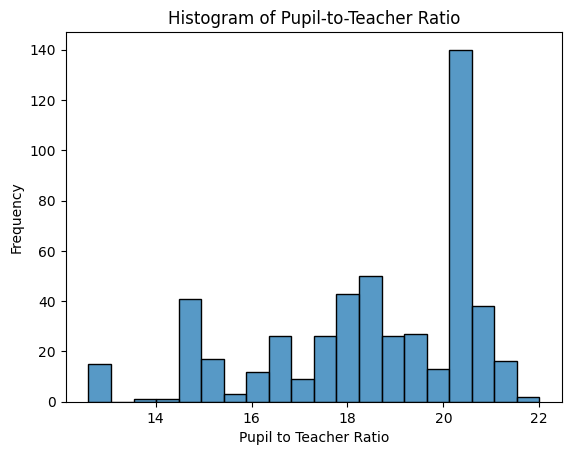

In [11]:
ax = sns.histplot(boston_df['PTRATIO'], bins=20, kde=False)
pyplot.xlabel('Pupil to Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.title('Histogram of Pupil-to-Teacher Ratio')

pyplot.show()

## **Task 3:Tests**

### Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not?(T-test for independent samples)

In [12]:
from scipy.stats import ttest_ind
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = scipy.stats.ttest_ind(group1, group0, equal_var=True)
print(f"T-statistic: {t_stat:.4f}")
print(f"P_value: {p_value:.4f}")

T-statistic: 3.9964
P_value: 0.0001


In [13]:
alpha = 0.05
p_value = 0.0001
if p_value < alpha:
    print("we reject H0: There is a significant difference in MEDV based on CHAS")
else:
    print("we do not reject H0: There is no significant difference in MEDV based on CHAS.")

we reject H0: There is a significant difference in MEDV based on CHAS


### Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?(ANOVA)

In [14]:
from scipy.stats import f_oneway
group1 = boston_df[boston_df['AGE_GROUP'] == "0-35"]['MEDV']
group2 = boston_df[boston_df['AGE_GROUP'] == "35-70"]['MEDV']
group3 = boston_df[boston_df['AGE_GROUP'] == "70+"]['MEDV']
f_stat, p_value = f_oneway(group1, group2, group3)
print(f"F_statistic: {f_stat:.4f}")
print(f"P_value: {p_value:.4f}")

F_statistic: 36.4076
P_value: 0.0000


In [15]:
alpha = 0.05
p_value = 0.0000
if p_value < alpha:
    print("we reject H0: There is a significant difference in median home values based on age_group.")
else:
    print(" we do not reject H0: There is no significant difference in median home values based on age_group.")
    

we reject H0: There is a significant difference in median home values based on age_group.


### Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?(Pearson Correlation)

In [16]:
from scipy.stats import pearsonr
r_value, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Correlation coefficient r = {r_value:.4f}")
print(f"P_value = {p_value:.4f}")

Correlation coefficient r = 0.7637
P_value = 0.0000


In [17]:
alpha = 0.05
p_value = 0.0000
if p_value < alpha:
    print("we reject H0: There is a relationship between NOX and INDUS.")
else:
    print("we do not reject H0: There is no relationship between NOX and INDUS.")

we reject H0: There is a relationship between NOX and INDUS.


### Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?(Regression analysis)

In [18]:
x = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 31 May 2025   Prob (F-statistic):           1.21e-08
Time:                        22:26:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

## Author 
 Rkia